In [11]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        

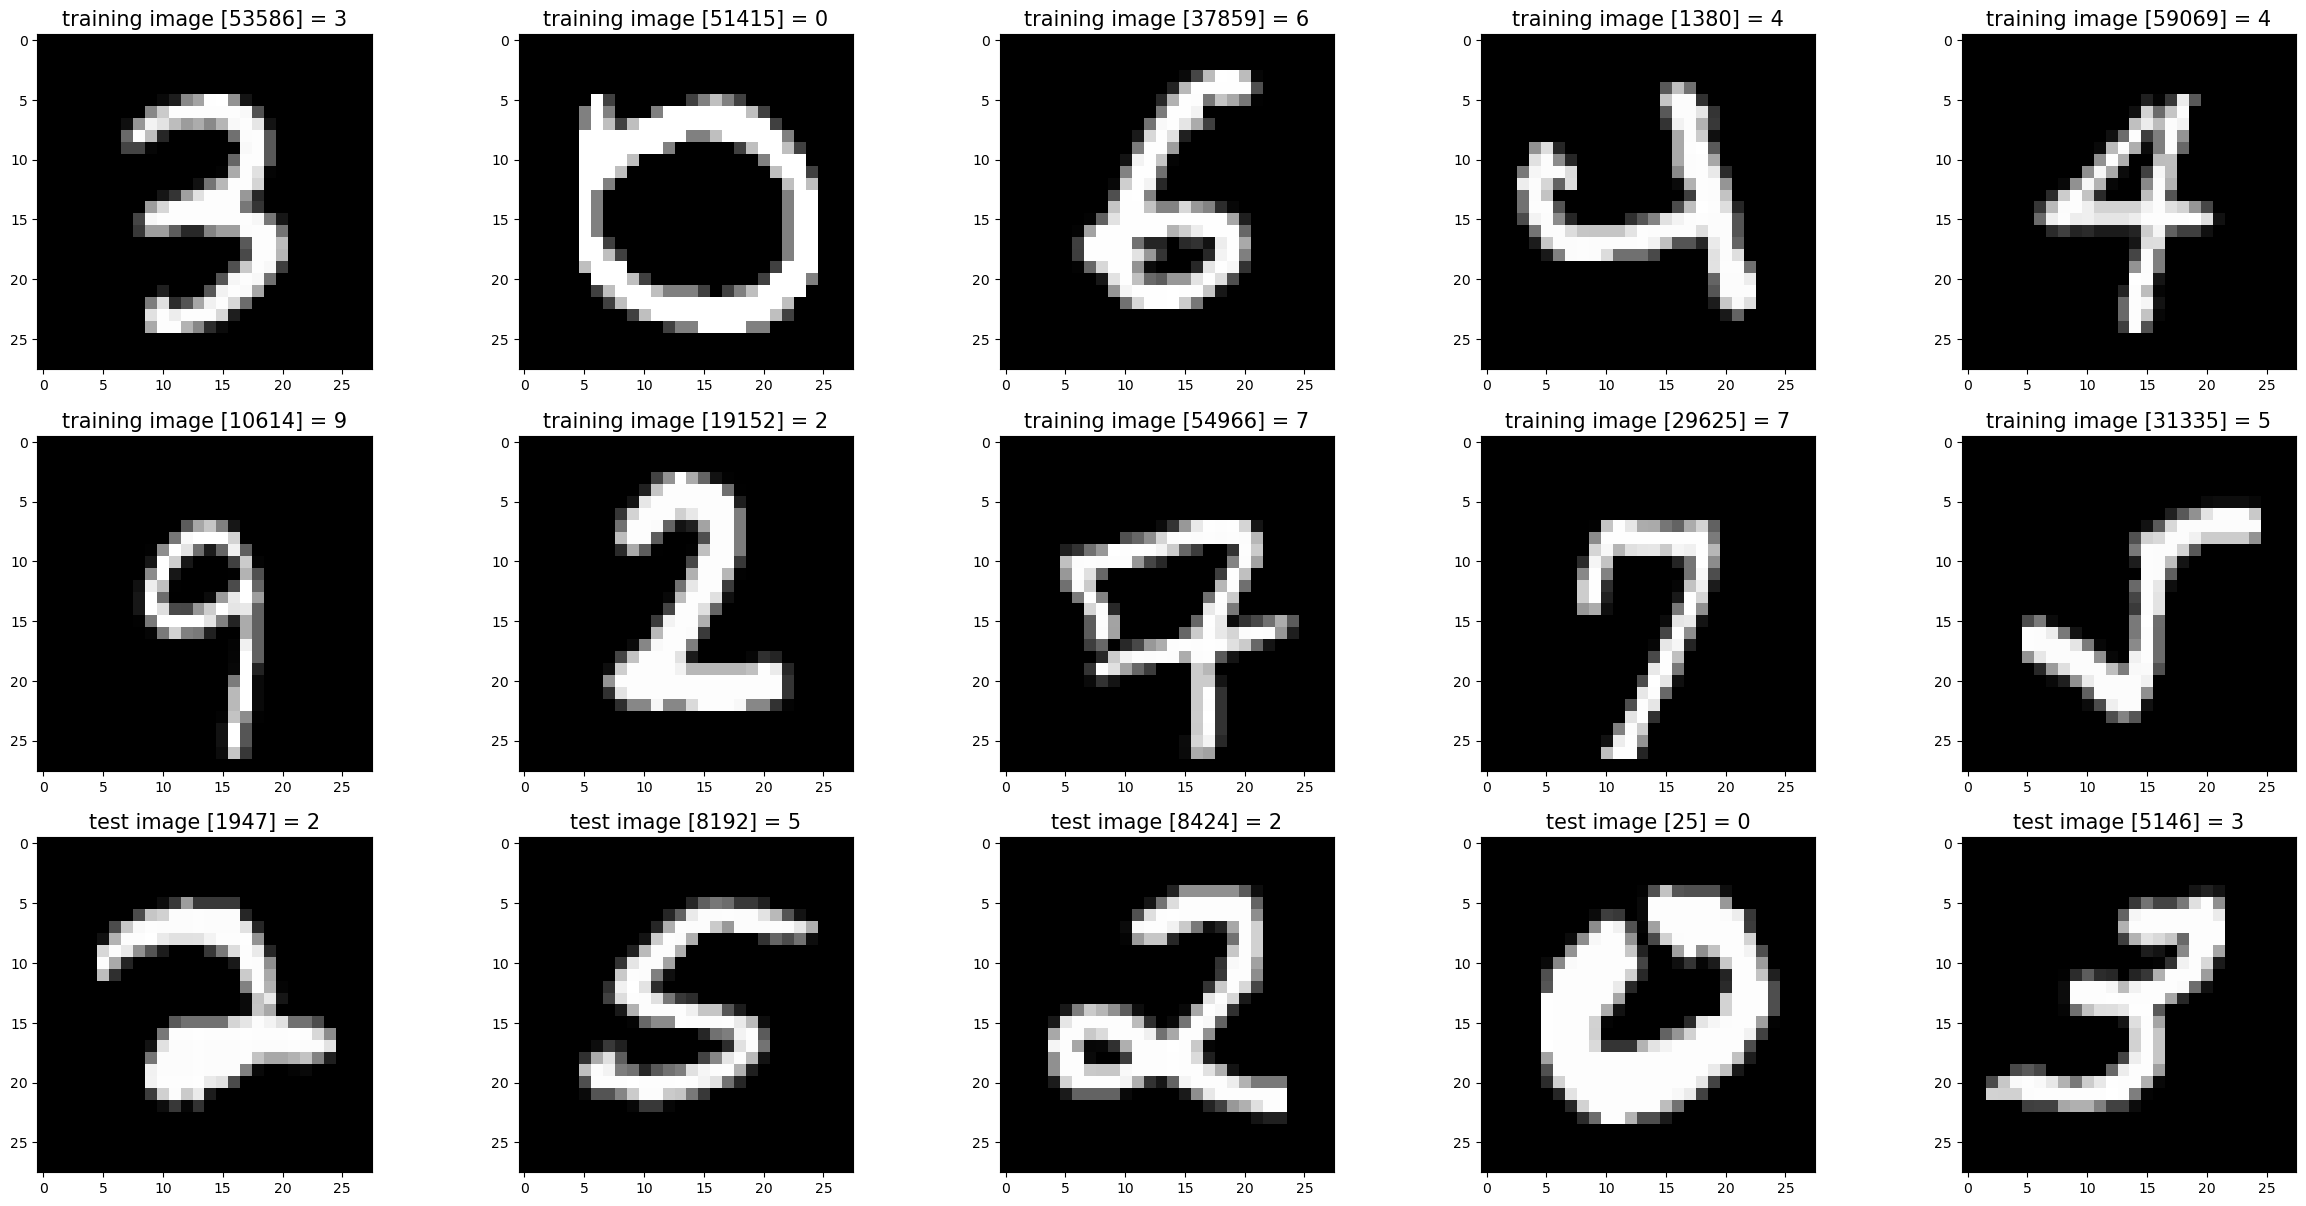

In [12]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '../MNIST_dataset'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
input_path = '../MNIST_dataset'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255

x_train = x_train.T
x_test = x_test.T
print(x_train.shape)
print(y_train.shape)

print(x_train[0, :].shape)
print(x_train)

(784, 60000)
(60000,)
(60000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
def initialise_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLu(Z):
    return np.maximum(0, Z)

def derive_ReLu(Z):
    return Z > 0

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_propagation(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derive_ReLu(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [16]:
def get_prediction(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def compute_loss(A2, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    loss = -1/m * np.sum(one_hot_Y * np.log(A2))
    return loss

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = initialise_parameters()
    losses = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        loss = compute_loss(A2, Y)
        losses.append(loss)
        if (i % 10 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_prediction(A2), Y))
    return W1, b1, W2, b2, losses



In [17]:
W1, b1, W2, b2, losses = gradient_descent(x_train, y_train, iterations = 1000, alpha = 0.1)


Iteration:  0
[9 0 9 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy:  0.09008333333333333
Iteration:  10
[9 0 7 ... 3 0 3] [5 0 4 ... 5 6 8]
Accuracy:  0.22805
Iteration:  20
[9 0 7 ... 3 0 3] [5 0 4 ... 5 6 8]
Accuracy:  0.32106666666666667
Iteration:  30
[5 0 7 ... 3 0 3] [5 0 4 ... 5 6 8]
Accuracy:  0.36898333333333333
Iteration:  40
[5 0 7 ... 3 0 3] [5 0 4 ... 5 6 8]
Accuracy:  0.4126666666666667
Iteration:  50
[5 0 7 ... 3 0 8] [5 0 4 ... 5 6 8]
Accuracy:  0.45353333333333334
Iteration:  60
[5 0 7 ... 3 0 8] [5 0 4 ... 5 6 8]
Accuracy:  0.4892
Iteration:  70
[5 0 7 ... 3 0 8] [5 0 4 ... 5 6 8]
Accuracy:  0.5210166666666667
Iteration:  80
[5 0 7 ... 3 0 8] [5 0 4 ... 5 6 8]
Accuracy:  0.5483166666666667
Iteration:  90
[5 0 7 ... 3 0 8] [5 0 4 ... 5 6 8]
Accuracy:  0.5747333333333333
Iteration:  100
[5 0 7 ... 3 0 8] [5 0 4 ... 5 6 8]
Accuracy:  0.59735
Iteration:  110
[5 0 7 ... 3 0 8] [5 0 4 ... 5 6 8]
Accuracy:  0.6184333333333333
Iteration:  120
[5 0 7 ... 3 0 8] [5 0 4 ... 5 6 8]
Accur

In [18]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

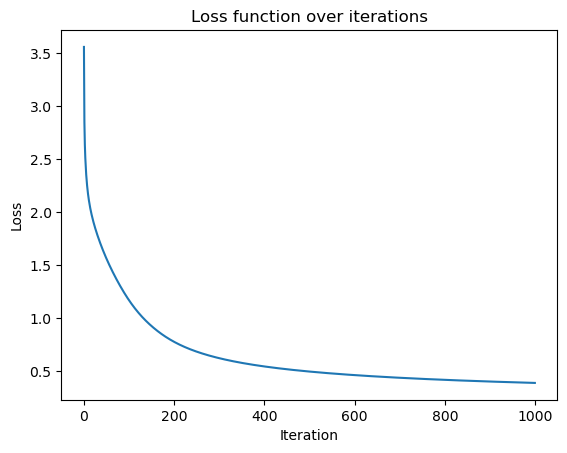

In [19]:
def plot_losses(losses):
    plt.plot(losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss function over iterations")
    plt.show()

plot_losses(losses)

Prediction:  [3]
Label:  5


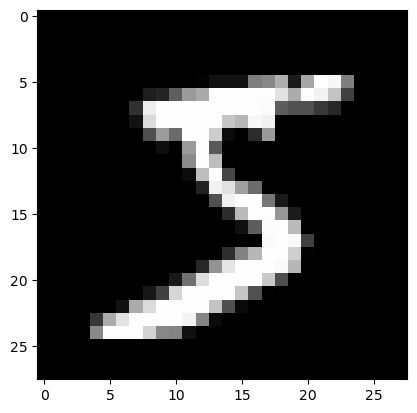

Prediction:  [0]
Label:  0


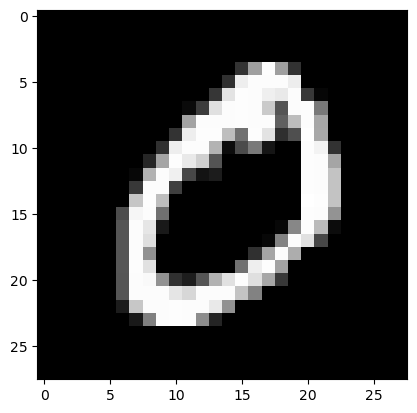

Prediction:  [4]
Label:  4


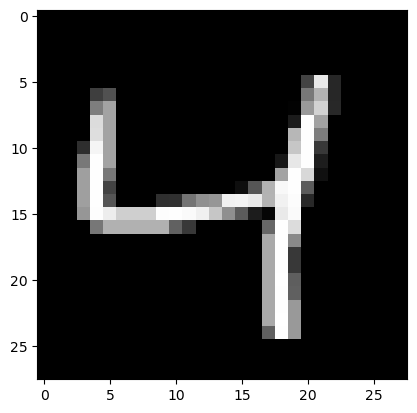

Prediction:  [1]
Label:  1


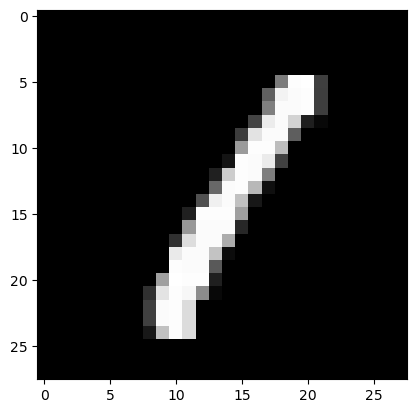

In [20]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [21]:
test_predictions = make_predictions(x_test, W1, b1, W2, b2)
get_accuracy(test_predictions, y_test)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


0.8866

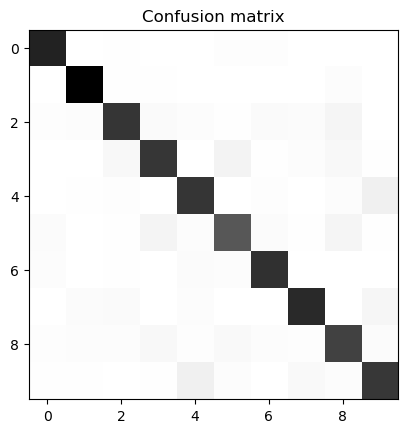

In [22]:
def calculate_confusion_matrix(true, pred):
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))
    for i in range(len(true)):
        result[true[i]][pred[i]] += 1
    return result

def plot_confusion_matrix(confusion_matrix):
    plt.imshow(confusion_matrix, cmap = 'binary', interpolation='None')
    plt.title("Confusion matrix")
    plt.show()

confusion_matrix = calculate_confusion_matrix(y_test, test_predictions)
plot_confusion_matrix(confusion_matrix)